# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

#### Importar a Base de dados

In [1]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

Grafio Correlação


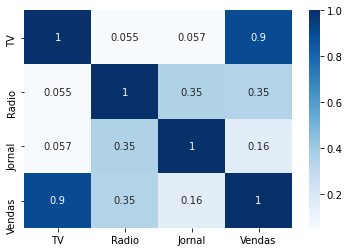

Grafico de Ruido


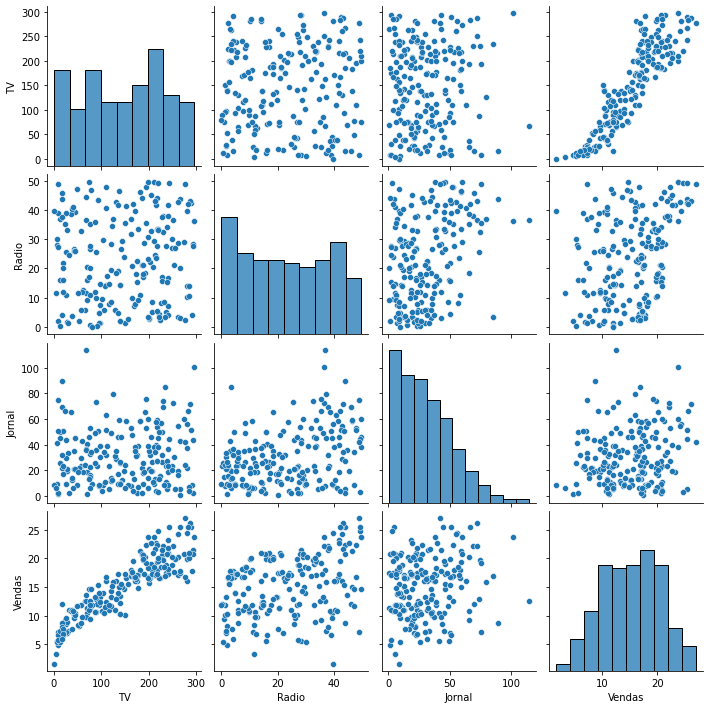

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(tabela.corr(), cmap="Blues", annot = True)
print("Grafio Correlação")
plt.show()

sns.pairplot(tabela)
print("Grafico de Ruido")
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [7]:
from sklearn.model_selection import train_test_split

#separar dados de x e de y

#quem é o y
y = tabela["Vendas"]

#quem é o x
x = tabela.drop("Vendas", axis = 1) #0 para linha e 1 para coluna

#aplicar a train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, random_state = 1)#random_state = 1 separa sempre a mesma base de dados para treino e teste
#test_size = 0.3 ou seja 30% dos dados para teste...deixar por padrão vai ficar em media 20% para teste

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressao_linear = LinearRegression()
modelo_random_forest = RandomForestRegressor()

modelo_regressao_linear.fit(x_treino,y_treino)
modelo_random_forest.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [9]:
prev_regressao_linear = modelo_regressao_linear.predict(x_teste)
prev_random_forest = modelo_random_forest.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, prev_regressao_linear))
print(metrics.r2_score(y_teste, prev_random_forest))

0.9048917241361681
0.967234317428181


#### Visualização Gráfica das Previsões

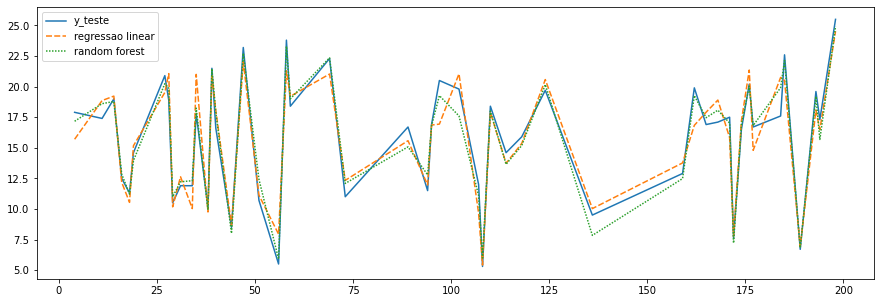

In [14]:
#random_forest é o melhor modelo
tabela_aux = pd.DataFrame()
tabela_aux ["y_teste"] = y_teste
tabela_aux ["regressao linear"] = prev_regressao_linear
tabela_aux ["random forest"] = prev_random_forest

plt.figure(figsize = (15,5))
sns.lineplot(data = tabela_aux)
plt.show()

# Qual a importância de cada variável para as vendas?

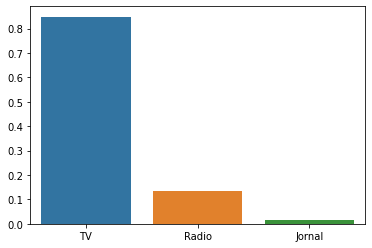

In [27]:
#aaaaaa
sns.barplot(x = x_treino.columns, y = modelo_random_forest.feature_importances_)
plt.show()

In [18]:
#### Fazer uma previsão
#importar nova tabela
import pandas as pd

nova_tabela = pd.read_csv("nova_tabela.csv")

previsao = modelo_random_forest.predict(nova_tabela)

print("Previsão: ", previsao)


Previsão:  [21.948]
